In [1]:
import numpy as np
from time import time

In [2]:
obj = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]
obj = np.array(obj)

In [3]:
obj

array([[0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0]])

In [4]:
def pi(a):
    for i in range(len(a)):
        if a[i] == np.nan:
            a[i] = 0
            
    s = np.nansum(a)
    if s == 0:
        s = 1e-5
        print('here')
    for i in range(len(a)):
        a[i] /= s
    return a

def get_pi(a):
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j] = pi(a[i][j])
    return a

In [5]:
def action(s):
    # eps는 사전 설정
    ## s_next 생성
    if np.random.rand() > eps:
        return np.argmax(v[s])
    else:
        return np.random.choice([0, 1, 2, 3]) # 상하좌우
    
def state_map(s, a):
    s = list(s)
    if a == 0:
        s[0] -= 1
    elif a == 1:
        s[0] += 1
    elif a == 2:
        s[1] -= 1
    else:
        s[1] += 1
    return tuple(s)


In [6]:
def update(s, a, r, s_next, v):
    # lr, gamma 는 위에서 설정하기
    if s_next == goal:
        v[s][a] = v[s][a] + lr * (r - v[s][a])
    else:
        v[s][a] = v[s][a] + lr * (r + gamma*np.max(v[s_next]) - v[s][a])
        
#     v[s] = pi(v[s])
    return v


In [7]:
def is_wall(s):
    if s[0] < 0 or s[0] > 3:
        return True
    elif s[1] < 0 or s[1] > 4:
        return True
    elif obj[s] == 1:
        return True
    else:
        return False

In [11]:
def play(s):
    global v, fail_hist, hist, eps
    temp_hist = []
    while 1:
        eps -= 0.01
        temp_hist.append(s)
#         print(s)
        a = action(s)
        s_next = state_map(s, a)
#         print(a, s, s_next)
        
#         if (0 > s[0] or s[0] > 3) or (0 > s[1] or s[1] > 4) or obj[s] == 1: ## 가면 안되는 곳
        if is_wall(s_next):
            fail_hist.append((s, s_next))
#             r = -1
            v[s][a] = 0
            v[s] = pi(v[s])
#             v = update(s, a, r, s_next, v)
#             print(v[s], s_next)
            s_next = (0, 0)
            
            
        elif s_next[0] == goal[0] and s_next[1] == goal[1]: ## 도착
            r = 1
            v = update(s, a, r, s_next, v)
            break
        else: ## 갈곳이 남음
            r = 0
            v = update(s, a, r , s_next, v)
            
        print(v[s])
        fake_obj[s_next] = 2
        print(fake_obj)
        fake_obj[s_next] = obj[s_next]
        print(eps)
            
        s = s_next
        
    hist.append(temp_hist)

In [12]:
shape = obj.shape
value = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]
for i in range(shape[0]):
    for j in range(shape[1]):
        value[i][j] = [0.25, 0.25, 0.25, 0.25] # 위, 아래, 좌, 우
v = np.array(value)

In [13]:
lr = 0.1
eps = 0.5
gamma = 0.9
v = np.array(value)
fail_hist = []
hist = []
fake_obj = obj.copy()

s_0 = (0, 0)
goal = (3, 4)

start = time()
for i in range(100):
    play(s_0)
    print('succes', i)
    print(eps)
#     eps = 0.5

lt = time() - start

[0.         0.33333333 0.33333333 0.33333333]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
0.49
[0.         0.3225     0.33333333 0.33333333]
[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
0.48
[0.255 0.25  0.25  0.25 ]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
0.47
[0.         0.49174079 0.         0.50825921]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
0.45999999999999996
[0.         0.49174079 0.         0.47993329]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
0.44999999999999996
[0.25   0.25   0.25   0.2475]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
0.43999999999999995
[0.         0.33333333 0.33333333 0.33333333]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
0.42999999999999994
[0.         0.46551671 0.         0.47993329]
[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
0.41999999999999993
[0.272694 0.25     0.25     0.25    ]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
0.4099999999999999
[0.         0.46551

[0.         0.33110368 0.34516732 0.33444816]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-1.4500000000000013
[0.         0.         0.35368433 0.35306873]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-1.4600000000000013
[0.         0.         0.35322344 0.35559294]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-1.4700000000000013
[0.         0.35349872 0.         0.35571616]
[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-1.4800000000000013
[0.33378505 0.25       0.25       0.25      ]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-1.4900000000000013
[0.         0.35349872 0.         0.3521479 ]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-1.5000000000000013
[0.         0.         0.35322344 0.35186523]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-1.5100000000000013
[0.         0.         0.350106   0.35306873]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-1.5200000000000014
[0.         0.         0.34971598 0.35186523]
[[

 [0 0 1 1 0]]
-3.5499999999999687
[0.         0.         0.30961429 0.30843145]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-3.5599999999999685
[0.         0.         0.31416706 0.31443212]
[[0 0 0 2 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-3.5699999999999683
[0.         0.31860606 0.31689401 0.        ]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-3.579999999999968
[0.         0.         0.31416706 0.31166346]
[[0 0 0 2 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-3.589999999999968
[0.         0.31567985 0.31689401 0.        ]
[[0 0 0 0 1]
 [0 1 1 2 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-3.5999999999999677
[0.32074209 0.31944429 0.         0.31985587]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 2 0]
 [0 0 1 1 0]]
-3.6099999999999675
[0.49748744 0.         0.         0.50251256]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-3.6199999999999672
[0.         0.30162488 0.         0.30252812]
[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-3.629999999999967
[0.29960136 0.25 

[0.31684955 0.36579925 0.         0.31674969]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 2 0]
 [0 0 1 1 0]]
-5.329999999999931
[0.38092383 0.         0.         0.37029452]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 2]
 [0 0 1 1 0]]
-5.339999999999931
[0.29605181 0.25       0.25       0.25      ]
[[0 0 0 0 1]
 [0 1 1 0 2]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-5.34999999999993
[0.         0.31360016 0.3245497  0.        ]
[[0 0 0 0 1]
 [0 1 1 2 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-5.35999999999993
[0.31684955 0.36350247 0.         0.31674969]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 2 0]
 [0 0 1 1 0]]
-5.36999999999993
[0.37554667 0.         0.         0.37029452]
[[0 0 0 0 1]
 [0 1 1 2 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-5.37999999999993
[0.31684955 0.36095142 0.         0.31674969]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 2 0]
 [0 0 1 1 0]]
-5.3899999999999295
[0.37047763 0.         0.         0.37029452]
[[0 0 0 0 1]
 [0 1 1 2 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-5.399999999999929
[0.31684955 0.35819927 0.         0.31674969]
[[0 0 0 0 1]


-8.299999999999867
[0.         0.         0.26442346 0.26587199]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-8.309999999999867
[0.         0.         0.26308432 0.26562528]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-8.319999999999867
[0.         0.26343679 0.         0.26401681]
[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-8.329999999999867
[0.26254226 0.25       0.25       0.25      ]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-8.339999999999867
[0.         0.26343679 0.         0.2615214 ]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-8.349999999999866
[0.         0.         0.26308432 0.26299123]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-8.359999999999866
[0.         0.         0.26442346 0.2632714 ]
[[0 0 0 2 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-8.369999999999866
[0.         0.2639182  0.26454045 0.        ]
[[0 0 0 0 1]
 [0 1 1 2 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-8.379999999999866
[0.26489321 0.26686723 0.         0.2

-10.95999999999981
[0.         0.32595838 0.32920178 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 2 1 1 0]]
-10.96999999999981
[0.31488424 0.25       0.25       0.25      ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]]
-10.97999999999981
[0.         0.32595838 0.32565703 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]]
-10.98999999999981
[0.31660326 0.31944429 0.         0.32309052]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]]
-10.99999999999981
[0.         0.32170212 0.32565703 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 2 1 1 0]]
-11.00999999999981
[0.31270495 0.25       0.25       0.25      ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]]
-11.01999999999981
[0.         0.32170212 0.32216947 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]]
-11.02999999999981
[0.31660326 0.31944429 0.         0.31977672]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]]
-11.039999999999809
[0.         0.32170212 0.31873243 0.

 [0 0 1 1 0]]
-13.81999999999975
[0.26760168 0.26709437 0.         0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]]
-13.82999999999975
[0.26809978 0.26883962 0.         0.27073929]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [2 0 1 1 0]]
-13.83999999999975
[0.27613305 0.         0.         0.27461745]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 2 1 1 0]]
-13.84999999999975
[0.25578341 0.25       0.25       0.25      ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]]
-13.859999999999749
[0.         0.26148174 0.26406096 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 2 1 1 0]]
-13.869999999999749
[0.25397055 0.25       0.25       0.25      ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]]
-13.879999999999749
[0.         0.26148174 0.2620214  0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]]
-13.889999999999748
[0.26809978 0.26883962 0.         0.26724729]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]]
-13.899999999999748
[0.         0.2614

[0.26357528 0.         0.26228242 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [2 0 1 1 0]]
-15.899999999999705
[0.26250401 0.         0.         0.26132853]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 2 1 1 0]]
-15.909999999999705
[0.26088445 0.         0.26228242 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]]
-15.919999999999705
[0.         0.26027236 0.25415707 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 2 1 1 0]]
-15.929999999999705
[0.26088445 0.         0.25967954 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [2 0 1 1 0]]
-15.939999999999705
[0.25939234 0.         0.         0.26132853]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]]
-15.949999999999704
[0.25419409 0.25700503 0.         0.25516278]
[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-15.959999999999704
[0.25051824 0.25220146 0.         0.        ]
[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-15.969999999999704
[0.         0.2472059  0.         0.24726168]
[[

 [2 0 1 1 0]]
-17.960000000000008
[0.22778648 0.         0.         0.2294461 ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]]
-17.97000000000001
[0.22865687 0.22839322 0.         0.22679223]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]]
-17.98000000000001
[0.         0.22744738 0.22819714 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 2 1 1 0]]
-17.990000000000013
[0.2281634  0.         0.22786925 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [2 0 1 1 0]]
-18.000000000000014
[0.22778648 0.         0.         0.2270362 ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 2 1 1 0]]
-18.010000000000016
[0.22588481 0.         0.22786925 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]]
-18.020000000000017
[0.         0.22744738 0.22595654 0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]]
-18.03000000000002
[0.22630201 0.22839322 0.         0.22679223]
[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-18.04000000000002
[0.22558084 0.2277

 [0 0 1 1 0]]
-19.8200000000003
[0.         0.         0.21506524 0.21443165]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-19.8300000000003
[0.         0.         0.22313093 0.22537629]
[[0 0 0 2 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-19.840000000000302
[0.         0.24422702 0.23741416 0.        ]
[[0 0 0 0 1]
 [0 1 1 2 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-19.850000000000303
[0.2530993  0.30270286 0.         0.25371129]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 2 0]
 [0 0 1 1 0]]
-19.860000000000305
[0.26245776 0.         0.         0.47831181]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 2]
 [0 0 1 1 0]]
-19.870000000000307
succes 12
-19.880000000000308
[0.         0.20568611 0.         0.2070915 ]
[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-19.89000000000031
[0.20639955 0.20614549 0.         0.        ]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]]
-19.90000000000031
[0.20645514 0.20604718 0.         0.20756035]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [2 0 1 1 0]]
-19.910000

-21.88000000000062
[0.         0.19190126 0.         0.19196402]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-21.890000000000622
[0.         0.         0.20591059 0.21468493]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-21.900000000000624
[0.         0.         0.22313093 0.26317002]
[[0 0 0 2 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-21.910000000000625
[0.         0.36349538 0.23741416 0.        ]
[[0 0 0 0 1]
 [0 1 1 2 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-21.920000000000627
[0.2530993  0.5341056  0.         0.25371129]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 2 0]
 [0 0 1 1 0]]
-21.93000000000063
[0.26245776 0.         0.         0.75430153]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 2]
 [0 0 1 1 0]]
-21.94000000000063
succes 27
-21.95000000000063
[0.         0.19190126 0.         0.19208926]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-21.960000000000633
[0.         0.         0.20591059 0.21690173]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-21.970000000000635
[0

 [0 0 1 1 0]]
-24.04000000000096
succes 57
-24.05000000000096
[0.         0.19190126 0.         0.29798485]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-24.06000000000096
[0.         0.         0.20591059 0.3974879 ]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-24.070000000000963
[0.         0.         0.22313093 0.51923636]
[[0 0 0 2 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-24.080000000000965
[0.         0.64984563 0.23741416 0.        ]
[[0 0 0 0 1]
 [0 1 1 2 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-24.090000000000966
[0.2530993  0.7752787  0.         0.25371129]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 2 0]
 [0 0 1 1 0]]
-24.100000000000968
[0.26245776 0.         0.         0.88979903]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 2]
 [0 0 1 1 0]]
-24.11000000000097
succes 58
-24.12000000000097
[0.         0.19190126 0.         0.30396028]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-24.130000000000972
[0.         0.         0.20591059 0.40447038]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 

-26.150000000001288
[0.         0.19190126 0.         0.45345119]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-26.16000000000129
[0.         0.         0.20591059 0.54305545]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-26.17000000000129
[0.         0.         0.22313093 0.63189955]
[[0 0 0 2 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-26.180000000001293
[0.         0.71909012 0.23741416 0.        ]
[[0 0 0 0 1]
 [0 1 1 2 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-26.190000000001294
[0.2530993  0.80695469 0.         0.25371129]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 2 0]
 [0 0 1 1 0]]
-26.200000000001296
[0.26245776 0.         0.         0.89937713]
[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 2]
 [0 0 1 1 0]]
-26.210000000001298
succes 88
-26.2200000000013
[0.         0.19190126 0.         0.45698106]
[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-26.2300000000013
[0.         0.         0.20591059 0.54562086]
[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
-26.240000000001302
[0. 

In [14]:
v

array([[[0.        , 0.19190126, 0.        , 0.48587049],
        [0.        , 0.        , 0.20591059, 0.56537611],
        [0.        , 0.        , 0.22313093, 0.64452632],
        [0.        , 0.72472817, 0.23741416, 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ]],

       [[0.19081258, 0.19204208, 0.        , 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.2530993 , 0.80881838, 0.        , 0.25371129],
        [0.        , 0.29143079, 0.25420675, 0.        ]],

       [[0.1905635 , 0.19183924, 0.        , 0.19158457],
        [0.        , 0.19149899, 0.1905267 , 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.26245776, 0.        , 0.        , 0.89978262],
        [0.24825882, 0.99998008, 0.25      , 0.25      ]],

       [[0.1916079 , 0.        , 0.        , 0.19065457],
        [0.19050337, 0.        , 0.19108746, 0.        ],
        

In [ ]:
value = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]

In [ ]:
eps

In [15]:
lt

2.299318313598633

In [17]:
c = 0
for h in hist:
    if len(h) == 7:
        c += 1
        
print(c)

79


In [21]:
lh = list(map(lambda x: len(x), hist))

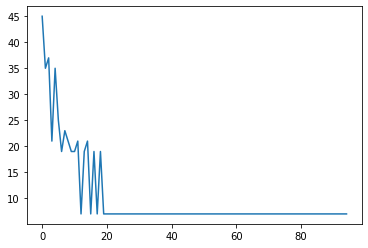

In [25]:
import matplotlib.pyplot as plt

plt.plot(lh[5:])

In [24]:
lh

[915,
 35,
 756,
 53,
 39,
 45,
 35,
 37,
 21,
 35,
 25,
 19,
 23,
 21,
 19,
 19,
 21,
 7,
 19,
 21,
 7,
 19,
 7,
 19,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7]